In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from MakineOgrenmesi.OdevRegression import regressor
%matplotlib inline

In [2]:
df = pd.read_csv("12-health_risk_classification.csv")

In [3]:
df.head()

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
0,0.564223,0.652825,1.262925,1
1,-1.692569,2.981229,-0.180331,1
2,0.770383,0.400475,1.365806,1
3,2.135007,0.150832,3.084596,0
4,0.360342,1.026132,1.251574,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bmi_score                 1000 non-null   float64
 1   blood_pressure_variation  1000 non-null   float64
 2   activity_level_index      1000 non-null   float64
 3   high_risk_flag            1000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


In [5]:
df.describe()

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.023702,0.016769,-0.020771,0.498000
std,1.203694,1.268761,1.392738,0.500246
min,-4.743951,-2.587178,-4.999018,0.000000
25%,-0.796655,-0.981320,-1.057938,0.000000
50%,0.142105,-0.317137,0.204506,0.000000
75%,0.956225,1.017388,1.061181,1.000000
max,2.321480,3.954873,3.477210,1.000000


<Axes: xlabel='bmi_score', ylabel='activity_level_index'>

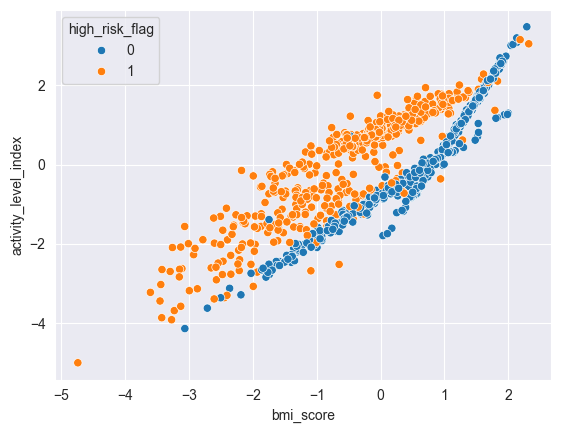

In [10]:
sns.scatterplot(df,x=df["bmi_score"],y=df["activity_level_index"],hue=df["high_risk_flag"])

<Axes: xlabel='bmi_score', ylabel='blood_pressure_variation'>

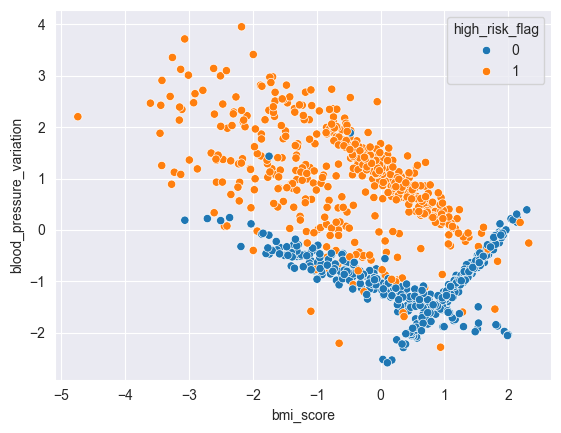

In [12]:
sns.scatterplot(df,x=df["bmi_score"],y=df["blood_pressure_variation"],hue=df["high_risk_flag"])

In [11]:
df["high_risk_flag"].value_counts()

high_risk_flag
0    502
1    498
Name: count, dtype: int64

In [14]:
X = df.drop("high_risk_flag", axis=1)
y = df["high_risk_flag"]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

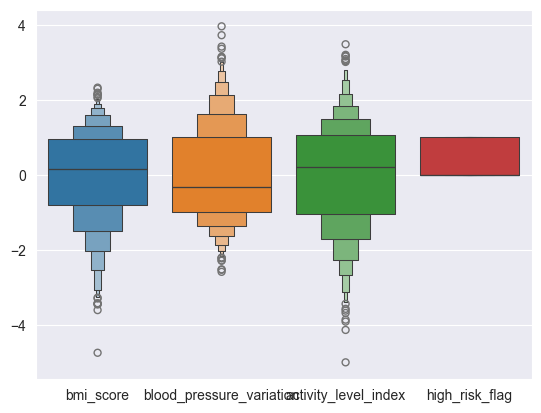

In [19]:
sns.boxenplot(df)
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
classifier = KNeighborsClassifier(n_neighbors=5,algorithm='auto',weights='uniform')
classifier.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [24]:
y_pred = classifier.predict(X_test_scaled)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred))
print("Classification Report\n",classification_report(y_test, y_pred))
print("Accuracy\n",accuracy_score(y_test, y_pred))

Confusion Matrix
 [[124   2]
 [ 10 114]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       126
           1       0.98      0.92      0.95       124

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

Accuracy
 0.952


In [27]:
classifier = KNeighborsClassifier(n_neighbors=5,algorithm='kd_tree',weights='uniform')
classifier.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'kd_tree'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [28]:
y_pred2 = classifier.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred2))
print("Classification Report\n",classification_report(y_test, y_pred2))
print("Accuracy\n",accuracy_score(y_test, y_pred2))

Confusion Matrix
 [[124   2]
 [ 10 114]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       126
           1       0.98      0.92      0.95       124

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

Accuracy
 0.952


In [29]:
classifier = KNeighborsClassifier(n_neighbors=3,algorithm='kd_tree',weights='uniform')
classifier.fit(X_train_scaled, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'kd_tree'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [30]:
y_pred3 = classifier.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred3))
print("Classification Report\n",classification_report(y_test, y_pred3))
print("Accuracy\n",accuracy_score(y_test, y_pred3))

Confusion Matrix
 [[125   1]
 [  9 115]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       126
           1       0.99      0.93      0.96       124

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

Accuracy
 0.96


In [31]:
df_reg = pd.read_csv("12-house_energy_regression.csv")

In [32]:
df_reg.head()

,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
0,-0.167118,0.146714,-14.996950
1,-0.020902,0.117327,-12.678089
2,0.150419,0.364961,17.775455
3,0.555604,0.089581,6.661465
4,0.058209,-1.142970,-14.195530


In [34]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   avg_indoor_temp_change        1000 non-null   float64
 1   outdoor_humidity_level        1000 non-null   float64
 2   daily_energy_consumption_kwh  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [35]:
df_reg.describe()

,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
count,1000.000000,1000.000000,1000.000000
mean,0.033186,0.056982,1.766025
std,0.961603,1.014959,41.299085
min,-3.241267,-2.940389,-132.797922
25%,-0.611581,-0.651418,-25.600072
50%,0.036043,0.047742,1.065474
75%,0.648317,0.714886,28.766573
max,3.078881,3.852731,138.577662


<Axes: xlabel='outdoor_humidity_level', ylabel='daily_energy_consumption_kwh'>

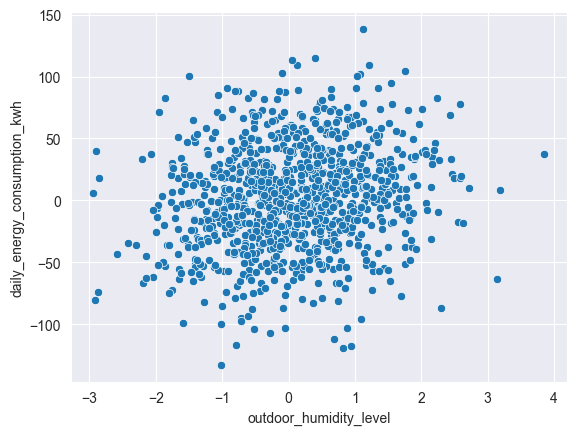

In [36]:
sns.scatterplot(x=df_reg["outdoor_humidity_level"],y=df_reg["daily_energy_consumption_kwh"])

<Axes: xlabel='avg_indoor_temp_change', ylabel='daily_energy_consumption_kwh'>

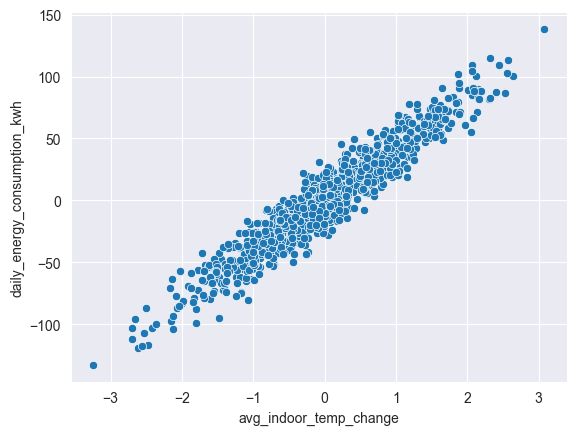

In [37]:
sns.scatterplot(x=df_reg["avg_indoor_temp_change"],y=df_reg["daily_energy_consumption_kwh"])

<Axes: >

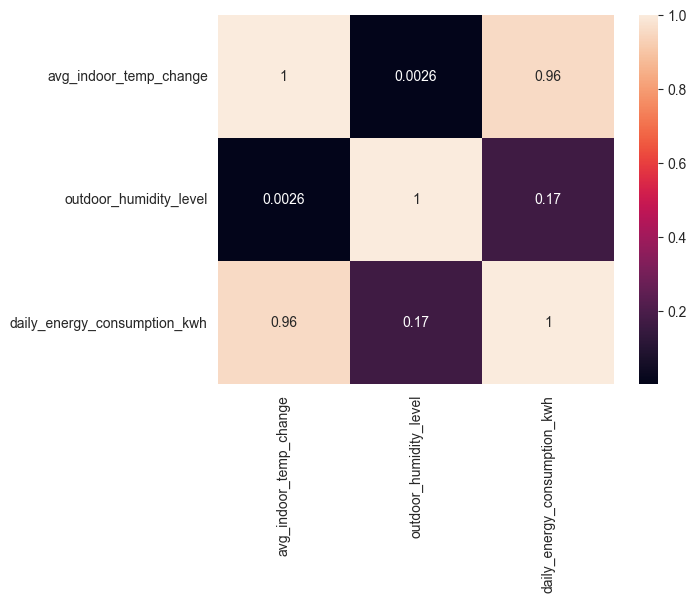

In [39]:
sns.heatmap(df_reg.corr(),annot=True)

In [40]:
X = df_reg.drop("daily_energy_consumption_kwh", axis=1)
y = df_reg["daily_energy_consumption_kwh"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
from sklearn.neighbors import KNeighborsRegressor

In [44]:
regressor = KNeighborsRegressor(n_neighbors=5,algorithm='auto',weights='uniform')
regressor.fit(X_train_scaled, y_train)
y_pred4 = regressor.predict(X_test_scaled)

In [45]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [46]:
print("r2 score",r2_score(y_test,y_pred4))
print("mean squared error",mean_squared_error(y_test,y_pred4))
print("mean absolute error",mean_absolute_error(y_test,y_pred4))

r2 score 0.9183109118983248
mean squared error 135.6610827281179
mean absolute error 9.228754406902722


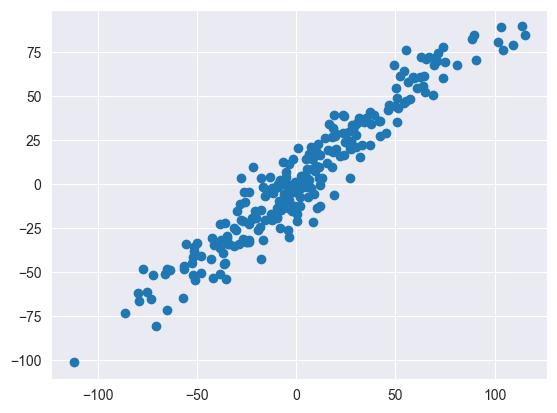

In [47]:
plt.scatter(y_test,y_pred4)

In [48]:
regressor = KNeighborsRegressor(n_neighbors=7,algorithm='auto',weights='uniform')
regressor.fit(X_train_scaled, y_train)
y_pred5 = regressor.predict(X_test_scaled)
print("r2 score",r2_score(y_test,y_pred5))
print("mean squared error",mean_squared_error(y_test,y_pred5))
print("mean absolute error",mean_absolute_error(y_test,y_pred5))

r2 score 0.9189374253850693
mean squared error 134.62063167240598
mean absolute error 9.326118628600977


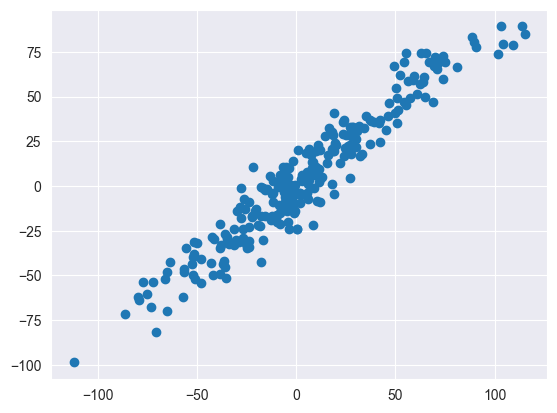

In [49]:
plt.scatter(y_test,y_pred5)